Paquetes necesarios

In [2]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt

Inicializaciones

In [3]:
#Dimensiones de la imagen a crear
ancho = 300
alto = 200

TAREA: Crea una imagen, p.e. de 800x800 píxeles, con la textura del tablero de ajedrez

TAREA: Crear una imagen estilo Mondrian (un ejemplo https://www3.gobiernodecanarias.org/medusa/ecoescuela/sa/2017/04/17/descubriendo-a-mondrian/ )

TAREA: Resuelve una de las tareas previas (a elegir) con las funciones de dibujo de OpenCV  :)

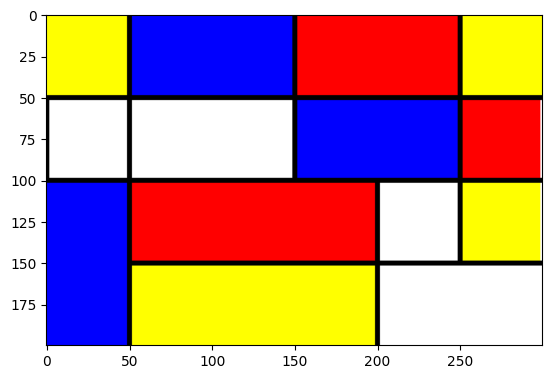

In [4]:
color_img = np.ones((alto, ancho, 3), dtype=np.uint8) * 255 #Fondo blanco

celda = 50 

for i in range(0, ancho, celda):
    cv2.line(color_img, (i, 0), (i, alto), (0, 0, 0), 2)  #Líneas negras verticales
for j in range(0, alto, celda):
    cv2.line(color_img, (0, j), (ancho, j), (0, 0, 0), 2)  #Líneas negras horizontales

#Rectángulos
cv2.rectangle(color_img, (0, 0), (48, 48), (255, 255, 0), -1)
cv2.rectangle(color_img, (52, 0), (148, 48), (0, 0, 255), -1)
cv2.rectangle(color_img, (152, 0), (248, 48), (255, 0, 0), -1)
cv2.rectangle(color_img, (252, 0), (300, 48), (255, 255, 0), -1)

cv2.rectangle(color_img, (52, 52), (148, 98), (255, 255, 255), -1)
cv2.rectangle(color_img, (152, 52), (248, 98), (0, 0, 255), -1)
cv2.rectangle(color_img, (252, 52), (298, 98), (255, 0, 0), -1)

cv2.rectangle(color_img, (0, 102), (48, 300), (0, 0, 255), -1)
cv2.rectangle(color_img, (52, 102), (198, 148), (255, 0, 0), -1)
cv2.rectangle(color_img, (252, 102), (298, 148), (255, 255, 0), -1)

cv2.rectangle(color_img, (52, 152), (198, 300), (255, 255, 0), -1)
cv2.rectangle(color_img, (202, 152), (300, 300), (255, 255, 255), -1)

plt.imshow(color_img) 
plt.show()

TAREA: Modifica de forma libre los valores de un plano de la imagen

In [5]:
vid = cv2.VideoCapture(0)
  
while(True):      
    # fotograma a fotograma
    ret, frame = vid.read()

    if ret:
        #Separamos canales
        b = frame[:,:,0]
        g = frame[:,:,1]
        r = frame[:,:,2]
        #Dimensiones imagen de entrada
        h, w, c = frame.shape
        
        #Se crea un canal modificado a partir de copia (Ejemplo: g)
        modified_g = g.copy()
        modified_g[:h,:w] = r + g

        #Concateamos en horizontal los tres planos del fotograma
        collage = np.hstack((r, modified_g, b))
    
        # Muestra fotograma redimensionando a la mitad para que quepa en pantalla
        cv2.imshow('RGB', cv2.resize(collage, (int(w*1.5),int(h/2)),cv2.INTER_NEAREST))
    
    # Detenemos pulsado ESC
    if cv2.waitKey(20) == 27:
        break
  
# Libera el objeto de captura
vid.release()
# Destruye ventanas
cv2.destroyAllWindows()

TAREA:
Pintar círculos en las posiciones del píxel más claro y oscuro de la imagen 
¿Si quisieras hacerlo sobre la zona 8x8 más clara/oscura?

TAREA: Llevar a cabo una propuesta propia de pop art

In [19]:
vid = cv2.VideoCapture(0)

# Dimensiones de la cámara
w = int(vid.get(cv2.CAP_PROP_FRAME_WIDTH))
h = int(vid.get(cv2.CAP_PROP_FRAME_HEIGHT))

#Fuerzo a mitad de resolución para ocupar menos pantalla
w = int(w / 2)
h = int(h / 2)
vid.set(cv2.CAP_PROP_FRAME_WIDTH, w)
vid.set(cv2.CAP_PROP_FRAME_HEIGHT, h)

# Imagen conjunta 2x original
collage = np.zeros((h * 2, w * 2, 3), dtype=np.uint8)
tl = collage[0:h, 0:w]
tr = collage[0:h, w:w + w]
bl = collage[h:h + h, 0:w]
br = collage[h:h + h, w:w + w]

# Se define el número de celdas
ncells = 12
off = int(ncells / 2)

def add_dots_effect(image, ncells=15):
    #Dimensiones originales
    h, w, c = image.shape
    #Redimensiono teniendo en cuenta ncells
    down_frame = cv2.resize(image, (int(w / ncells), int(h / ncells)), cv2.INTER_NEAREST)
    #Dimensiones reducidas
    h2, w2, c2 = down_frame.shape

    # Recorremos los valores de la imagen reducida para superponer puntos
    for y in range(0, h2):
        for x in range(0, w2):
            #Separamos canales
            r = down_frame[y, x, 2]
            g = down_frame[y, x, 1]
            b = down_frame[y, x, 0]
            
            # Ajustamos el color del punto para que contraste con el fondo
            avg_color = (r + g + b) // 3
            contrast_factor = 1.5  # Factor de contraste
            bright_r = int(min(255, r * contrast_factor))
            bright_g = int(min(255, g * contrast_factor))
            bright_b = int(min(255, b * contrast_factor))
            color = (int(bright_b), int(bright_g), int(bright_r))  # Color del punto más brillante

            # Ajustamos el radio en función del brillo de la celda, un poco más grande para mejor visibilidad
            rad = int((avg_color) / (ncells * 2)) + 2  # Hacemos los puntos más visibles

            # Dibujamos los círculos sobre la imagen original
            cv2.circle(image, (x * ncells + off, y * ncells + off), max(2, rad), color, -1)

    return image

while True:
    # Fotograma a fotograma
    ret, frameIN = vid.read()

    # Redimensionamos el fotograma para ajustarse al tamaño deseado
    frame = cv2.resize(frameIN, (int(w), int(h)), cv2.INTER_NEAREST)

    if ret:
        # Separamos canales
        r = frame[:, :, 2]
        g = frame[:, :, 1]
        b = frame[:, :, 0]

        #Jugamos con los valores de los planos
        # Top-left Original
        tl[:, :, 0] = b
        tl[:, :, 1] = g
        tl[:, :, 2] = r

        # Top-right naranja rosa
        tr[:, :, 0] = 155 -r
        tr[:, :, 1] = 0 +r
        tr[:, :, 2] = 200
        

        # Bottom-left verde azul
        bl[:, :, 0] = 255 -b
        bl[:, :, 1] = 255 +b
        bl[:, :, 2] = 55

        # Bottom-right amarillo lila
        br[:, :, 0] = 255 -b
        br[:, :, 1] = 0 +b
        br[:, :, 2] = 155

        # Añadimos efecto puntos
        dotted_collage = np.zeros_like(collage)
        dotted_collage[0:h, 0:w] = tl  # Top-left, sin efecto
        dotted_collage[0:h, w:w + w] = add_dots_effect(tr.copy(), ncells)
        dotted_collage[h:h + h, 0:w] = add_dots_effect(bl.copy(), ncells)
        dotted_collage[h:h + h, w:w + w] = add_dots_effect(br.copy(), ncells)

        # Muestra composición
        cv2.imshow('Cam', dotted_collage)

    # Detenemos pulsado ESC
    if cv2.waitKey(20) == 27:
        break

# Libera el objeto de captura
vid.release()
# Destruye ventanas
cv2.destroyAllWindows()

C:\Users\Sara\AppData\Local\Temp\ipykernel_1860\1743381023.py:41: RuntimeWarning: overflow encountered in scalar add
  avg_color = (r + g + b) // 3
